<a href="https://colab.research.google.com/github/AnshKambli/Time-Series-Analysis/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume
Ticker         SBIN.NS     SBIN.NS     SBIN.NS     SBIN.NS   SBIN.NS
Date                                                                
2010-01-04  192.488800  193.228112  191.127806  191.127806  11031470
2010-01-05  192.560226  194.068244  191.556274  193.900222  11613740
2010-01-06  193.715378  194.488289  191.967922  192.976066  14527930
2010-01-07  192.631638  194.068252  191.640299  193.732209   8576510
2010-01-08  192.056168  193.555789  191.556294  192.724063  10453820
Enter the number of days into the future you want to forecast (e.g., 1 for the next day): 
Invalid input: invalid literal for int() with base 10: ''. Please enter a positive integer.
Enter the number of days into the future you want to forecast (e.g., 1 for the next day): 0
Invalid input: The number of days must be greater than 0.. Please enter a positive integer.
Enter the number of days into the future you want to forecast (e.g., 1 for the ne

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



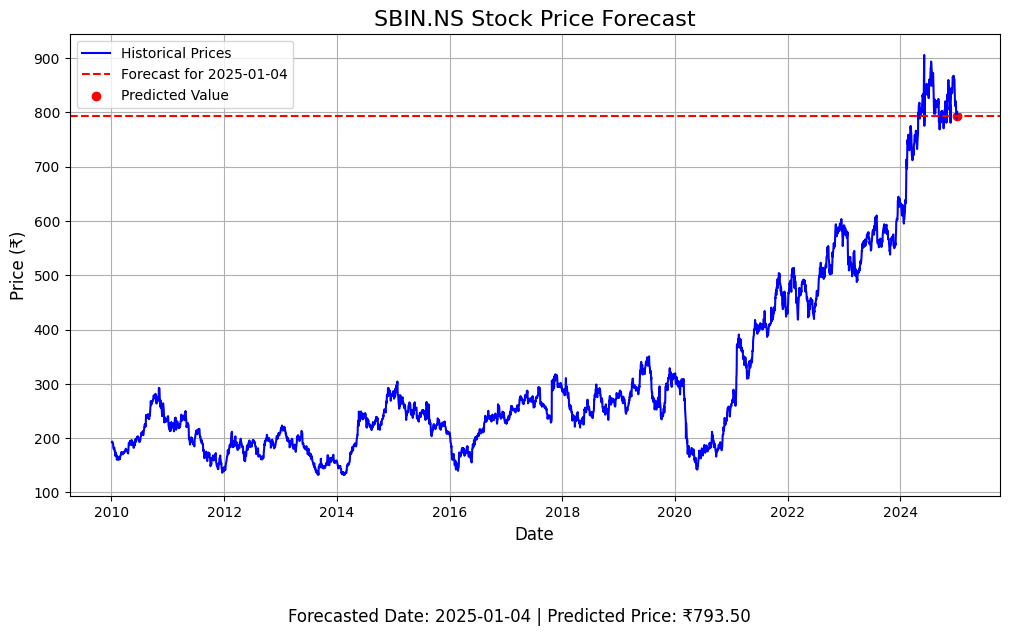

In [19]:
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Download data
ticker = 'SBIN.NS'
data = yf.download(ticker, start="2010-01-01", end="2025-01-05")

if data.empty:
    raise ValueError("The data fetched is empty. Check the ticker or date range.")
print(data.head())

# Ensure Close column exists
if 'Close' not in data.columns:
    raise KeyError("'Close' column not found in the dataset.")

# Prompt user to enter the number of days into the future they want to forecast
while True:
    try:
        days_ahead = int(input("Enter the number of days into the future you want to forecast (e.g., 1 for the next day): "))
        if days_ahead <= 0:
            raise ValueError("The number of days must be greater than 0.")
        break
    except ValueError as e:
        print(f"Invalid input: {e}. Please enter a positive integer.")

# ARIMA Model
train_data = data['Close']
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()

# Forecast for user-specified days
forecast = model_fit.forecast(steps=days_ahead)
forecast_value = forecast.iloc[-1]  # Extract the forecasted value for the user-specified date

# Confidence Interval
forecast_ci = model_fit.get_forecast(steps=days_ahead).conf_int(alpha=0.05)
forecast_ci.reset_index(drop=True, inplace=True)  # Reset index for safety
lower_bound = forecast_ci.iloc[-1, 0]
upper_bound = forecast_ci.iloc[-1, 1]

# Calculate forecasted date
forecasted_date = data.index[-1] + pd.Timedelta(days=days_ahead)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Historical Prices', color='blue')
plt.axhline(y=forecast_value, color='red', linestyle='--', label=f'Forecast for {forecasted_date.strftime("%Y-%m-%d")}')

# Highlight prediction point
plt.scatter([forecasted_date], [forecast_value], color='red', label='Predicted Value')

# Title and labels
plt.title(f'{ticker} Stock Price Forecast', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (₹)', fontsize=12)
plt.legend()
plt.grid()

# Add forecasted date and price below the graph
plt.figtext(0.5, -0.1, f"Forecasted Date: {forecasted_date.strftime('%Y-%m-%d')} | Predicted Price: ₹{forecast_value:.2f}", ha="center", fontsize=12)

# Show plot
plt.show()
